In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import nibabel as nib
import matplotlib.pyplot as plt

from os.path import join

from scipy.stats import fligner
from nilearn import plotting, datasets, surface

/Users/katherine.b/Library/Python/3.8/lib/python/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
sns.set(style='whitegrid', context='talk')
plt.rcParams["font.family"] = "monospace"
plt.rcParams['font.monospace'] = 'Courier New'

In [3]:
crayons = sns.crayon_palette(['Aquamarine', 'Fuchsia', 
                              'Jungle Green', 'Fern'])

In [4]:
PROJ_DIR = "/Volumes/projects_herting/LABDOCS/Personnel/Katie/deltaABCD_clustering/"
DATA_DIR = "data/"
FIGS_DIR = "figures/"
OUTP_DIR = "output/"

In [5]:
df = pd.read_csv(join(PROJ_DIR, DATA_DIR, "data.csv"), index_col=0, header=0)

In [6]:
df.drop(list(df.filter(regex='lesion.*').columns), axis=1, inplace=True)
df.drop(list(df.filter(regex='.*_cf12_.*').columns), axis=1, inplace=True)
no_2yfu = df[df["interview_date.2_year_follow_up_y_arm_1"].isna() == True].index
df = df.drop(no_2yfu, axis=0)

In [7]:
deltasmri_complete = pd.concat([df.filter(regex='smri.*change_score'), 
                                df.filter(regex='mrisdp.*change_score')], axis=1).dropna()
deltarsfmri_complete = df.filter(regex='rsfmri.*change_score').dropna(how='any')
deltarsi_complete = df.filter(regex='dmri_rsi.*change_score').dropna()
deltadti_complete = df.filter(regex='dmri_dti.*change_score').dropna()

In [8]:
img_modalities = {'smri': deltasmri_complete,
                  'fmri': deltarsfmri_complete,
                  'rsi': deltarsi_complete, 
                  'dti': deltadti_complete}

In [9]:
tests = ['variance', 
         'fligner_sex',
         'fligner_puberty',
         'fligner_raceth', 
         'fligner_income', 
         'fligner_edu', 
         'fligner_marital', 
         'fligner_age', 
         'fligner_scanner']

In [10]:
alpha = 0.05
values = ['stat', 'p', 'diff', 'greater', f'a<{alpha}']
columns = pd.MultiIndex.from_product([tests, values])

var_df = pd.DataFrame(columns=columns)

In [11]:
age_bins = np.zeros((9,))
ages = df['interview_age.baseline_year_1_arm_1'].sort_values().unique()

i = 0
j = 0
while j < 27.:
    age_bins[i] = ages[j]
    i += 1
    j += 3

/var/folders/t5/4bz0680d45n5_5m30ny85m540000gp/T/ipykernel_31387/3026442557.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  age_hist = pd.Series()
/Users/katherine.b/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

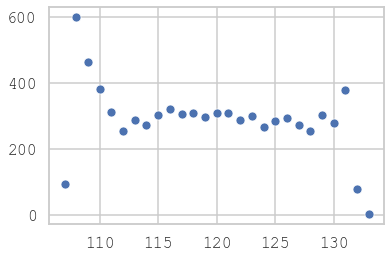

In [12]:
age_hist = pd.Series()
for age in ages:
    age_hist.at[age] =  len(df[df['interview_age.baseline_year_1_arm_1'] == age].index)
sns.scatterplot(age_hist.index, age_hist.values)

In [13]:
df[['pds_p_ss_female_category_2.baseline_year_1_arm_1',
    'pds_p_ss_male_category_2.baseline_year_1_arm_1']]
df['pds_p_ss_category_2.baseline_year_1_arm_1'] = df['pds_p_ss_female_category_2.baseline_year_1_arm_1'].fillna(0) + df['pds_p_ss_male_category_2.baseline_year_1_arm_1'].fillna(0)


In [14]:
# check group sizes
m = df[df['sex.baseline_year_1_arm_1'] == 'M'].index
f = df[df['sex.baseline_year_1_arm_1'] == 'F'].index
print('sex\n', f'f:\t{len(f)}')

puberty = 'pds_p_ss_category_2.baseline_year_1_arm_1'
one = df[df[puberty] == 1.].index
two = df[df[puberty] == 2.].index
three = df[df[puberty] == 3.].index
print('puberty\n'
              f'1:\t{len(one)}\n2:\t{len(two)}\n3:\t{len(three)}')

race = 'race_ethnicity.baseline_year_1_arm_1'
white = df[df[race] == 1.].index
black = df[df[race] == 2.].index
hispanic = df[df[race] == 3.].index
asian = df[df[race] == 4.].index
other = df[df[race] == 5.].index
print('\nrace\n',len(white), len(black), len(hispanic), len(asian) + len(other))

income = 'demo_comb_income_v2.baseline_year_1_arm_1'
lt50k = len(df[df[income] < 7.].index)
lt100 = len(df[df[income].between(7., 8.)].index)
gt100 = len(df[df[income].between(9., 10.)].index)
print('\nincome\n',lt50k, lt100, gt100)

edu = 'demo_prnt_ed_v2.baseline_year_1_arm_1'
one = len(df[df[edu] == 1].index)
two = len(df[df[edu] == 2].index)
three = len(df[df[edu] == 3].index)
four = len(df[df[edu] == 4].index)
five = len(df[df[edu] == 5].index)
six = len(df[df[edu] == 6].index)
seven = len(df[df[edu] == 7].index)
eight = len(df[df[edu] == 8].index)
nine = len(df[df[edu] == 9].index)
ten = len(df[df[edu] == 10].index)
eleven = len(df[df[edu] == 11].index)
twelve = len(df[df[edu] == 12].index)
thirteen = len(df[df[edu] == 13].index)
fourteen = len(df[df[edu] == 14].index)
fifteen = len(df[df[edu] == 15].index)
sixteen = len(df[df[edu] == 16].index)
seventeen = len(df[df[edu] == 17].index)
eighteen = len(df[df[edu] == 18].index)
nineteen = len(df[df[edu] == 19].index)
twenty = len(df[df[edu] == 20].index)
twentyone = len(df[df[edu] == 21].index)
print('\neducation\n', one, two, three, four, five, six, 
                      seven, eight, nine, ten, #sevens, 
                      eleven, twelve, thirteen, fourteen, fifteen,
                      sixteen, seventeen, eighteen, nineteen, twenty, twentyone)
lt_hs = len(df[df[edu] < 12].index)
hs_ged = len(df[df[edu].between(13, 14)].index)
college = len(df[df[edu] == 15].index)
aa_deg = len(df[df[edu].between(16, 17)].index)
bachelors = len(df[df[edu] == 18].index)
graduate = len(df[df[edu].between(19, 22)].index)
print(lt_hs + hs_ged, college + aa_deg, bachelors, graduate)

age = 'interview_age.baseline_year_1_arm_1'
one = len(df[df[age] < age_bins[1]].index)
two = len(df[df[age].between(age_bins[1], age_bins[2], inclusive='left')].index)
three = len(df[df[age].between(age_bins[2], age_bins[3], inclusive='left')].index)
four = len(df[df[age].between(age_bins[3], age_bins[4], inclusive='left')].index)
five = len(df[df[age].between(age_bins[4], age_bins[5], inclusive='left')].index)
six = len(df[df[age].between(age_bins[5], age_bins[6], inclusive='left')].index)
seven = len(df[df[age].between(age_bins[6], age_bins[7], inclusive='left')].index)
eight = len(df[df[age].between(age_bins[7], age_bins[8], inclusive='left')].index)
#nine = len(df[df[age].between(age_bins[8], age_bins[9] - 1.)].index)
ten = len(df[df[age] >= age_bins[8]].index)
print('\nage\n',one, two, three, four, five, six, 
                      seven, eight, #nine, 
      ten)

#marital status
marry = "demo_prnt_marital_v2.baseline_year_1_arm_1"
married = len(df[df[marry] == 1.].index)
widowed = len(df[df[marry] == 2.].index)
divorced = len(df[df[marry] == 3.].index)
separated = len(df[df[marry] == 4.].index)
never = len(df[df[marry] == 5.].index)
refuse = len(df[df[marry] == 777.].index)
print('\nmarital\n', married, widowed + divorced + separated + never)

sex
 f:	3596
puberty
1:	4048
2:	1755
3:	1632

race
 4300 1028 1514 960

income
 2029 2164 3011

education
 2 1 5 2 1 34 14 36 89 63 113 106 590 150 1304 571 457 2300 1507 218 227
1100 2332 2300 1952

age
 1156 945 861 935 912 850 848 837 458

marital
 5429 1925


In [15]:
for modality in img_modalities.keys():
    variables = img_modalities[modality].columns
    for var in variables:
        # compute variance across the sample
        var_df.at[var, ('variance', 'stat')] = np.var(df[var])
        
        # compare variance between male and female participants
        m = df[df['sex.baseline_year_1_arm_1'] == 'M'][var].dropna()
        f = df[df['sex.baseline_year_1_arm_1'] == 'F'][var].dropna()
        test = fligner(m, f)
        var_df.at[var, ('fligner_sex', 'stat')] = test[0]
        var_df.at[var, ('fligner_sex', 'p')] = test[1]
        var_df.at[var, ('fligner_sex', 'diff')] = np.mean(f) - np.mean(m)
        var_df.at[var, ('fligner_sex', 'greater')] = 'f'
        if test[1] < alpha:
            var_df.at[var, ('fligner_sex', f'a<{alpha}')] = '**'
        else:
            var_df.at[var, ('fligner_sex', f'a<{alpha}')] = 'ns'
        
        # compare variance between pubertal stages at baseline, female ppts
        puberty = 'pds_p_ss_category_2.baseline_year_1_arm_1'
        one = df[df[puberty] == 1.][var].dropna()
        two = df[df[puberty] == 2.][var].dropna()
        three = df[df[puberty] == 3.][var].dropna()
        
        test = fligner(one, two, three)
        var_df.at[var, ('fligner_puberty', 'stat')] = test[0]
        var_df.at[var, ('fligner_puberty', 'p')] = test[1]
        if test[1] < alpha:
            var_df.at[var, ('fligner_puberty', f'a<{alpha}')] = '**'
        else:
            var_df.at[var, ('fligner_puberty', f'a<{alpha}')] = 'ns'
        
        var_dict = {'1': np.mean(one), 
                    '2': np.mean(two), 
                    '3': np.mean(three)}
        max_key = max(var_dict, key=var_dict.get)
        min_val = min(var_dict.values())
        sorted_keys = {k: v for k, v in sorted(var_dict.items(), key=lambda item: item[1])}
        var_df.at[var, ('fligner_puberty', 'diff')] = var_dict[max_key] - min_val
        var_df.at[var, ('fligner_puberty', 'greater')] = [list(sorted_keys.keys())]
        
        # compare variance between pubertal stages at baseline, male ppts
        #puberty = 'pds_p_ss_male_category_2.baseline_year_1_arm_1'
        #one = df[df[puberty] == 1.][var].dropna()
        #two = df[df[puberty] == 2.][var].dropna()
        #three = df[df[puberty] == 3.][var].dropna()
        
        #test = fligner(one, two, three)
        #var_dict = {'1': np.mean(one), 
        #            '2': np.mean(two), 
        #            '3': np.mean(three)}
        #max_key = max(var_dict, key=var_dict.get)
        #min_val = min(var_dict.values())
        #sorted_keys = {k: v for k, v in sorted(var_dict.items(), key=lambda item: item[1])}
        #var_df.at[var, ('fligner_puberty_m', 'diff')] = var_dict[max_key] - min_val
        #var_df.at[var, ('fligner_puberty_m', 'greater')] = [list(sorted_keys.keys())]
        #var_df.at[var, ('fligner_puberty_m', 'stat')] = test[0]
        #var_df.at[var, ('fligner_puberty_m', 'p')] = test[1]
        #if test[1] < alpha:
        #    var_df.at[var, ('fligner_puberty_m', f'a<{alpha}')] = '**'
        #else:
        #    var_df.at[var, ('fligner_puberty_m', f'a<{alpha}')] = 'ns'
        
        # compare variance between sexes at baseline, pubertal stages
        #puberty_f = 'pds_p_ss_female_category_2.baseline_year_1_arm_1'
        #puberty_m = 'pds_p_ss_male_category_2.baseline_year_1_arm_1'
        #one_f = df[df[puberty_f] == 1.][var].dropna()
        #two_f = df[df[puberty_f] == 2.][var].dropna()
        #three_f = df[df[puberty_f] == 3.][var].dropna()
        #one_m = df[df[puberty_m] == 1.][var].dropna()
        #two_m = df[df[puberty_m] == 2.][var].dropna()
        #three_m = df[df[puberty_m] == 3.][var].dropna()
        #test = fligner(one_f, one_m)
        
        #var_df.at[var, ('fligner_puberty_1', 'stat')] = test[0]
        #var_df.at[var, ('fligner_puberty_1', 'p')] = test[1]
        #var_df.at[var, ('fligner_puberty_1', 'diff')] = np.mean(one_f) - np.mean(one_m)
        #var_df.at[var, ('fligner_puberty_1', 'greater')] = 'f'
        #if test[1] < alpha:
        #    var_df.at[var, ('fligner_puberty_1', f'a<{alpha}')] = '**'
        #else:
        #    var_df.at[var, ('fligner_puberty_1', f'a<{alpha}')] = 'ns'
        #test = fligner(two_f, two_m)
        #var_df.at[var, ('fligner_puberty_2', 'stat')] = test[0]
        #var_df.at[var, ('fligner_puberty_2', 'p')] = test[1]
        #var_df.at[var, ('fligner_puberty_2', 'diff')] = np.mean(two_f) - np.mean(two_m)
        #var_df.at[var, ('fligner_puberty_2', 'greater')] = 'f'
        #if test[1] < alpha:
        #    var_df.at[var, ('fligner_puberty_2', f'a<{alpha}')] = '**'
        #else:
        #    var_df.at[var, ('fligner_puberty_2', f'a<{alpha}')] = 'ns'
        #test = fligner(three_f, three_m)
        #var_df.at[var, ('fligner_puberty_3', 'stat')] = test[0]
        #var_df.at[var, ('fligner_puberty_3', 'p')] = test[1]
        #var_df.at[var, ('fligner_puberty_3', 'diff')] = np.mean(three_f) - np.mean(three_m)
        #var_df.at[var, ('fligner_puberty_3', 'greater')] = 'f'
        #if test[1] < alpha:
        #    var_df.at[var, ('fligner_puberty_3', f'a<{alpha}')] = '**'
        #else:
        #    var_df.at[var, ('fligner_puberty_3', f'a<{alpha}')] = 'ns'
        
        #compare variance across race/ethnicities
        race = 'race_ethnicity.baseline_year_1_arm_1'
        white = df[df[race] == 1.][var].dropna()
        black = df[df[race] == 2.][var].dropna()
        hispanic = df[df[race] == 3.][var].dropna()
        asian = df[df[race] == 4.][var].dropna()
        other = df[df[race] == 5.][var].dropna()
        asian_other = df[df[race].between(4., 5.)][var].dropna()
        test = fligner(white, black, hispanic, asian_other)
        var_df.at[var, ('fligner_raceth', 'stat')] = test[0]
        var_df.at[var, ('fligner_raceth', 'p')] = test[1]
        if test[1] < alpha:
            var_df.at[var, ('fligner_raceth', f'a<{alpha}')] = '**'
        else:
            var_df.at[var, ('fligner_raceth', f'a<{alpha}')] = 'ns'
        
        # compare variance across income
        income = 'demo_comb_income_v2.baseline_year_1_arm_1'
        lt50k = df[df[income] < 7.][var].dropna()
        lt100 = df[df[income].between(7., 8.)][var].dropna()
        gt100 = df[df[income].between(9., 10.)][var].dropna()
        
        test = fligner(lt50k, lt100, gt100)
        var_df.at[var, ('fligner_income', 'stat')] = test[0]
        var_df.at[var, ('fligner_income', 'p')] = test[1]
        if test[1] < alpha:
            var_df.at[var, ('fligner_income', f'a<{alpha}')] = '**'
        else:
            var_df.at[var, ('fligner_income', f'a<{alpha}')] = 'ns'
        
        # compare variance across education
        edu = 'demo_prnt_ed_v2.baseline_year_1_arm_1'
        hs_ged = df[df[edu] <= 14][var].dropna()
        #hs_ged = df[df[edu].between(13, 14)][var].dropna()
        #college = df[df[edu] == 15][var].dropna()
        lt_4yuni = df[df[edu].between(15, 17)][var].dropna()
        bachelors = df[df[edu] == 18][var].dropna()
        graduate = df[df[edu].between(19, 22)][var].dropna()
        
        test = fligner(hs_ged, lt_4yuni, bachelors, graduate)
        var_df.at[var, ('fligner_edu', 'stat')] = test[0]
        var_df.at[var, ('fligner_edu', 'p')] = test[1]
        if test[1] < alpha:
            var_df.at[var, ('fligner_edu', f'a<{alpha}')] = '**'
        else:
            var_df.at[var, ('fligner_edu', f'a<{alpha}')] = 'ns'
        
        # compare variance across age, binned by n0th percentiles
        # age_bins are calculated above
        age = 'interview_age.baseline_year_1_arm_1'
        one = df[df[age] <= age_bins[1]][var].dropna()
        two = df[df[age].between(age_bins[1], age_bins[2], inclusive='left')][var].dropna()
        three = df[df[age].between(age_bins[2], age_bins[3], inclusive='left')][var].dropna()
        four = df[df[age].between(age_bins[3], age_bins[4], inclusive='left')][var].dropna()
        five = df[df[age].between(age_bins[4], age_bins[5], inclusive='left')][var].dropna()
        six = df[df[age].between(age_bins[5], age_bins[6], inclusive='left')][var].dropna()
        seven = df[df[age].between(age_bins[6], age_bins[7], inclusive='left')][var].dropna()
        eight = df[df[age].between(age_bins[7], age_bins[8], inclusive='left')][var].dropna()
        #nine = df[df[age].between(age_bins[8], age_bins[9], inclusive='left')][var].dropna()
        ten = df[df[age] >= age_bins[8]][var].dropna()
                 
        test = fligner(one, two, three, four, five, six, 
                      seven, eight, #nine, 
                       ten)
        var_df.at[var, ('fligner_age', 'stat')] = test[0]
        var_df.at[var, ('fligner_age', 'p')] = test[1]
        if test[1] < alpha:
            var_df.at[var, ('fligner_age', f'a<{alpha}')] = '**'
        else:
            var_df.at[var, ('fligner_age', f'a<{alpha}')] = 'ns'
        
         # compare variance across scanner manufacturers
        mri = 'mri_info_manufacturer.baseline_year_1_arm_1'
        siemens = df[df[mri] == 'SIEMENS'][var].dropna()
        ge = df[df[mri] == 'GE MEDICAL SYSTEMS'][var].dropna()
        philips = df[df[mri] == 'Philips Medical Systems'][var].dropna()
        
        test = fligner(siemens, philips, ge)
        var_df.at[var, ('fligner_scanner', 'stat')] = test[0]
        var_df.at[var, ('fligner_scanner', 'p')] = test[1]
        if test[1] < alpha:
            var_df.at[var, ('fligner_scanner', f'a<{alpha}')] = '**'
        else:
            var_df.at[var, ('fligner_scanner', f'a<{alpha}')] = 'ns'
        
        # compare variance across parent marital status
        marry = "demo_prnt_marital_v2.baseline_year_1_arm_1"
        married = df[df[marry] == 1.][var].dropna()
        notmarried = df[df[marry].between(2,5)][var].dropna()
        widowed = df[df[marry] == 2.][var].dropna()
        divorced = df[df[marry] == 3.][var].dropna()
        separated = df[df[marry] == 4.][var].dropna()
        never = df[df[marry] == 5.][var].dropna()
        refuse = df[df[marry] == 777.][var].dropna()
        
        test = fligner(married, notmarried
                       #widowed, 
                       #separated, 
                       #divorced, 
                       #never, 
                       #refuse
                      )
        var_df.at[var, ('fligner_marital', 'stat')] = test[0]
        var_df.at[var, ('fligner_marital', 'p')] = test[1]
        if test[1] < alpha:
            var_df.at[var, ('fligner_marital', f'a<{alpha}')] = '**'
        else:
            var_df.at[var, ('fligner_marital', f'a<{alpha}')] = 'ns'

In [16]:
var_df.dropna(how='all', axis=1, inplace=True)

In [17]:

var_df.to_csv(join(PROJ_DIR, 
                   #'..',
                   OUTP_DIR, 
                   'variance_flinger.csv'))

In [18]:

var_df = pd.read_csv(join(PROJ_DIR, 
                   #'..',
                   OUTP_DIR, 
                   'variance_flinger.csv'), index_col=0, header=[0,1])

In [19]:
concepts = {'morph': ['thick', 
                      'area', 
                      'vol',
                      'gmvol',
                      'dtivol'],
            'cell': ['t1wcnt', 
                     'rsirni', 
                     'rsirnd', 
                     'dtifa', 
                     'dtimd'],
            'func':['var',
                    'c',
                     'cor']}

In [20]:
var_df

variance fligner_sex                \
                                               stat        stat             p   
smri_vol_scs_intracranialv.change_score    1.581418   37.344470  9.900121e-10   
smri_vol_cdk_total.change_score            1.316309   27.431595  1.627504e-07   
smri_area_cdk_banksstslh.change_score      8.202061    1.768325  1.835895e-01   
smri_area_cdk_cdacatelh.change_score       7.183843    0.048548  8.256090e-01   
smri_area_cdk_cdmdfrlh.change_score        8.005432    0.046386  8.294754e-01   
...                                             ...         ...           ...   
dmri_dtivol_fiberat_sifclh.change_score    9.545437    1.121887  2.895124e-01   
dmri_dtivol_fiberat_ifsfcrh.change_score   4.564034    5.528232  1.871201e-02   
dmri_dtivol_fiberat_ifsfclh.change_score   6.622358   15.862649  6.810975e-05   
dmri_dtivol_fiberat_fxcutrh.change_score  15.667113    1.535585  2.152761e-01   
dmri_dtivol_fiberat_fxcutlh.change_score  16.252235    1.567314  2.105975e-01   

                                                                   \
                                              diff greater a<0.05   
smri_vol_scs_intracranialv.change_score   0.081282       f     **   
smri_vol_cdk_total.change_score          -0.314164       f     **   
smri_area_cdk_banksstslh.change_score    -0.392274       f     ns   
smri_area_cdk_cdacatelh.change_score     -0.156068       f     ns   
smri_area_cdk_cdmdfrlh.change_score      -0.248972       f     ns   
...                                            ...     ...    ...   
dmri_dtivol_fiberat_sifclh.change_score  -0.018292       f     ns   
dmri_dtivol_fiberat_ifsfcrh.change_score  0.290483       f     **   
dmri_dtivol_fiberat_ifsfclh.change_score  0.229797       f     **   
dmri_dtivol_fiberat_fxcutrh.change_score -0.002509       f     ns   
dmri_dtivol_fiberat_fxcutlh.change_score -0.002932       f     ns   

                                         fligner_puberty                \
                                                    stat             p   
smri_vol_scs_intracranialv.change_score        76.461612  2.492137e-17   
smri_vol_cdk_total.change_score                75.079874  4.972933e-17   
smri_area_cdk_banksstslh.change_score           0.323049  8.508457e-01   
smri_area_cdk_cdacatelh.change_score            4.581722  1.011793e-01   
smri_area_cdk_cdmdfrlh.change_score             0.262132  8.771599e-01   
...                                                  ...           ...   
dmri_dtivol_fiberat_sifclh.change_score         9.665231  7.965660e-03   
dmri_dtivol_fiberat_ifsfcrh.change_score       16.102915  3.186372e-04   
dmri_dtivol_fiberat_ifsfclh.change_score       14.509913  7.066633e-04   
dmri_dtivol_fiberat_fxcutrh.change_score       10.243670  5.965066e-03   
dmri_dtivol_fiberat_fxcutlh.change_score       23.966283  6.248673e-06   

                                                                       ...  \
                                              diff            greater  ...   
smri_vol_scs_intracranialv.change_score   0.191715  [['3', '1', '2']]  ...   
smri_vol_cdk_total.change_score           0.499156  [['3', '2', '1']]  ...   
smri_area_cdk_banksstslh.change_score     0.554359  [['3', '2', '1']]  ...   
smri_area_cdk_cdacatelh.change_score      0.317557  [['3', '2', '1']]  ...   
smri_area_cdk_cdmdfrlh.change_score       0.401720  [['3', '2', '1']]  ...   
...                                            ...                ...  ...   
dmri_dtivol_fiberat_sifclh.change_score   0.035576  [['1', '2', '3']]  ...   
dmri_dtivol_fiberat_ifsfcrh.change_score  0.254656  [['1', '2', '3']]  ...   
dmri_dtivol_fiberat_ifsfclh.change_score  0.148089  [['1', '3', '2']]  ...   
dmri_dtivol_fiberat_fxcutrh.change_score  0.500860  [['3', '2', '1']]  ...   
dmri_dtivol_fiberat_fxcutlh.change_score  0.392302  [['3', '2', '1']]  ...   

                                         fligner_edu fligner_marital  \
                                         

In [21]:
for var in var_df.index:
    #print(var)
    if 'mrisdp' in var:
        var_num = int(var.split('.')[0].split('_')[-1])
        var_df.at[var, 'modality'] = 'smri'
        var_df.at[var, 'atlas'] = 'dtx'
        if var_num <= 148:
            var_df.at[var, 'measure'] = 'thick'
        elif var_num <= 450 and var_num >= 303:
            var_df.at[var, 'measure'] = 'area'
        elif var_num < 604 and var_num >= 450:
            var_df.at[var, 'measure'] = 'vol'
        elif var_num <= 1054 and var_num >= 907:
            var_df.at[var, 'measure'] = 't1wcnt'
        elif var_num == 604:
            var_df.at[var, 'measure'] = 'gmvol'
    elif '_' in var:
        var_list = var.split('.')[0].split('_')
        var_df.at[var, 'modality'] = var_list[0]
        var_df.at[var, 'measure'] = var_list[1]
        var_df.at[var, 'atlas'] = var_list[2]
        var_df.at[var, 'region'] = '_'.join(var_list[3:])

var_df = var_df[var_df['measure'] != 't1w']
var_df = var_df[var_df['measure'] != 't2w']

In [22]:
for i in var_df.index:
    measure = var_df.loc[i]['measure']
    measure = str(measure.values[0])
    if measure in concepts['morph']:
        var_df.at[i,'concept'] = 'morphology'
    elif measure in concepts['cell']:
        var_df.at[i,'concept'] = 'microstructure
    elif measure in concepts['func']:
        var_df.at[i,'concept'] = 'function'

In [23]:
# plot the distribution of variances of all structural mri measures
smri_var = img_modalities['smri'].columns
dti_var = img_modalities['dti'].columns
rsi_var = img_modalities['rsi'].columns
fmri_var = img_modalities['fmri'].columns
fmri_cor_var = img_modalities['fmri'].filter(regex='_c.*').columns
fmri_var_var = img_modalities['fmri'].filter(regex='_var_.*').columns

morph_var = var_df[var_df['concept'] == 'morphology'].index
cell_var = var_df[var_df['concept'] == 'microstructure].index
func_var = fmri_var_var
conn_var = fmri_cor_var

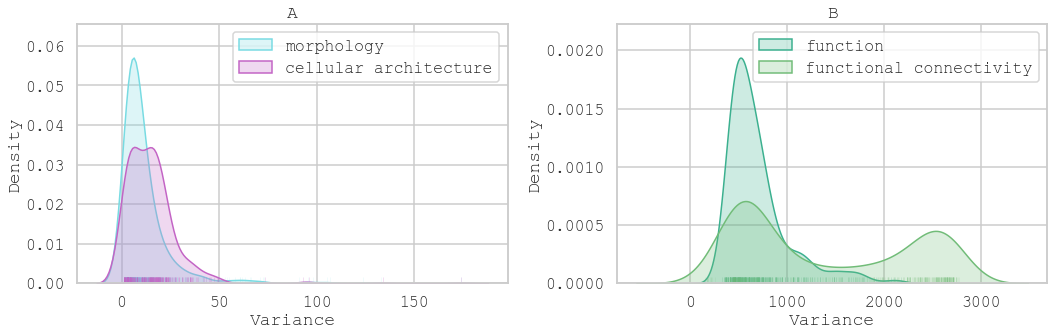

In [24]:
fig,ax = plt.subplots(ncols=2, figsize=(15,5))
g = sns.kdeplot(var_df.loc[morph_var, ('variance', 'stat')], color=crayons[0], shade=True, ax=ax[0])
h = sns.kdeplot(var_df.loc[cell_var, ('variance', 'stat')], color=crayons[1], shade=True, ax=ax[0])
#i = sns.kdeplot(var_df.loc[func_var, ('variance', 'stat')], color=crayons[2], shade=True, ax=ax[0])
#m = sns.kdeplot(var_df.loc[fmri_var, ('variance', 'stat')], color=crayons[3])
j = sns.rugplot(var_df.loc[morph_var, ('variance', 'stat')], color=crayons[0], lw=1, alpha=.1, ax=ax[0])
k = sns.rugplot(var_df.loc[cell_var, ('variance', 'stat')], color=crayons[1], lw=1, alpha=0.2, ax=ax[0])
#l = sns.rugplot(var_df.loc[rsi_var, ('variance', 'stat')], color=crayons[2], lw=1, alpha=.1, ax=ax[0])
#n = sns.rugplot(var_df.loc[fmri_var, ('variance', 'stat')], color=crayons[3])
ax[0].set_xlabel('Variance')
plt.tight_layout()
ax[0].legend(['morphology', 
           'microstructure, 
           #'rsi', 
           #'fmri'
          ])
ax[0].set_title('A')

m = sns.kdeplot(var_df.loc[func_var, ('variance', 'stat')], color=crayons[2], shade=True, ax=ax[1])
o = sns.kdeplot(var_df.loc[conn_var, ('variance', 'stat')], color=crayons[3], shade=True, ax=ax[1])
n = sns.rugplot(var_df.loc[func_var, ('variance', 'stat')], color=crayons[2], lw=1, alpha=.1, ax=ax[1])
p = sns.rugplot(var_df.loc[conn_var, ('variance', 'stat')], color=crayons[3], lw=1, alpha=.1, ax=ax[1])
ax[1].set_xlabel('Variance')
plt.tight_layout()
ax[1].legend(['function',
              'functional connectivity'
          ])
ax[1].set_title('B')
fig.savefig('../figures/apchange_variance_concept.png', dpi=400)
#sns.displot(var_df.loc[fmri_var, ('variance', 'stat')])

In [25]:
sex_diff = {}
for modality in img_modalities.keys():
    variables = img_modalities[modality].columns
    sex_diff[modality] = np.sum(var_df.loc[variables][('fligner_sex', 'p')] < 0.01) / len(variables)

In [26]:
print('Proportion of measures from each modality that exhibit significant sex differences in change scores:\n',
      sex_diff)

Proportion of measures from each modality that exhibit significant sex differences in change scores:
 {'smri': 0.1768018018018018, 'fmri': 0.11213720316622691, 'rsi': 0.040983606557377046, 'dti': 0.16216216216216217}


## Visualizing brain heterogeneity across non-brain variables
1. Variability across all brain measures
2. Per modality
3. Across the brain
4. Across developmental variables
5. Across demographic variables

In [27]:
for var in var_df.index:
    for modality in img_modalities.keys():
        if var in img_modalities[modality]:
            var_df.at[var, 'modality'] = modality

In [28]:
var_df[var_df['modality'] == 'fmri'][('variance', 'stat')].sort_values()

rsfmri_c_ngd_ca_ngd_ca.change_score             155.958120
rsfmri_c_ngd_cgc_ngd_cgc.change_score           170.853194
rsfmri_c_ngd_dt_ngd_dt.change_score             175.487514
rsfmri_c_ngd_vs_ngd_vs.change_score             177.021058
rsfmri_c_ngd_rspltp_ngd_rspltp.change_score     179.584220
                                                  ...     
rsfmri_cor_ngd_none_scs_bs.change_score        2742.079965
rsfmri_cor_ngd_df_scs_thplh.change_score       2745.036297
rsfmri_cor_ngd_fopa_scs_crcxrh.change_score    2752.969579
rsfmri_cor_ngd_vs_scs_aalh.change_score        2764.342993
rsfmri_cor_ngd_vta_scs_cderh.change_score      2772.300771
Name: (variance, stat), Length: 758, dtype: float64

In [29]:
devt = ['fligner_age', 
        'fligner_sex',
        'fligner_puberty']
demo =  ['fligner_raceth',
         'fligner_income',
         'fligner_edu',
         'fligner_marital', 
         #'fligner_scanner'
        ]

In [30]:
stats = var_df.drop(['variance'], axis=1).xs('stat', level=1, axis=1)
alphas = var_df.xs(f'a<0.05', level=1, axis=1)
modalities = var_df['concept']


/Users/katherine.b/Library/Python/3.8/lib/python/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [31]:
alphas = alphas.add_suffix('_alpha')

In [32]:
demo_alphas = [f'{i}_alpha' for i in demo]
devt_alphas = [f'{i}_alpha' for i in devt]

In [33]:
mod_demo = pd.concat([stats[demo], modalities], axis=1).melt(value_vars=demo, 
                                                  value_name='Flinger-Killeen Statistic',
                                                  id_vars='concept').drop('variable', axis=1)
alpha_demo = alphas[demo_alphas].melt(value_name='Significant')
demo_flinger = pd.concat([mod_demo, alpha_demo], axis=1)

mod_devt = pd.concat([stats[devt], modalities], axis=1).melt(value_vars=devt, 
                                                  value_name='Flinger-Killeen Statistic',
                                                  id_vars='concept')
alpha_devt = alphas[devt_alphas].melt(value_name='Significant').drop('variable', axis=1)
devt_flinger = pd.concat([mod_devt, alpha_devt], axis=1)

In [34]:
mod_devt

,concept,variable,Flinger-Killeen Statistic
0,morphology,fligner_age,59.566113
1,morphology,fligner_age,28.277305
2,morphology,fligner_age,23.041533
3,morphology,fligner_age,11.762937
4,morphology,fligner_age,21.830255
...,...,...,...
5632,morphology,fligner_puberty,9.665231
5633,morphology,fligner_puberty,16.102915
5634,morphology,fligner_puberty,14.509913
5635,morphology,fligner_puberty,10.243670


In [39]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5), squeeze=True)
g = sns.stripplot(x='variable', y='Flinger-Killeen Statistic',
                  data=devt_flinger[devt_flinger['Significant'] == '**'], 
                  hue='concept',
                  marker='o',
                  size=7,
                  edgecolor='white',
                  dodge=True,
                  linewidth=0.5,
                  ax=ax[0],
                  palette=crayons,
                  hue_order=['morphology', 
                           'microstructure, 
                           'function']
                 )
k = sns.stripplot(x='variable', y='Flinger-Killeen Statistic',
                  data=devt_flinger[devt_flinger['Significant'] != '**'], 
                  hue='concept',
                  marker='P',
                  size=11,
                  linewidth=0.5,
                  edgecolor='white',
                  dodge=True,
                  ax=ax[0],
                  palette=crayons,
                  hue_order=['morphology', 
                           'microstructure, 
                           'function']
                 )
g.get_legend().remove()
g.set_ylabel('Flinger-Killeen Statistic')
g.set_xlabel('')
g.set_xticklabels(['Age', 'Sex', 'Puberty'])


h = sns.stripplot(x='variable', y='Flinger-Killeen Statistic',
                  data=demo_flinger[demo_flinger['Significant'] == '**'], 
                  hue='concept',
                    marker='o',
                  size=7,
                  linewidth=0.5,
                  edgecolor='white',
                  dodge=True,
                  ax=ax[1],
                  palette=crayons,
                  hue_order=['morphology', 
                           'microstructure, 
                           'function'],
              
                 )
j = sns.stripplot(x='variable', y='Flinger-Killeen Statistic',
                  data=demo_flinger[demo_flinger['Significant'] != '**'], 
                  hue='concept',
                    marker='P',
                  size=11,
                  linewidth=0.5,
                  dodge=True,
                  edgecolor='white',
                  ax=ax[1],
                  palette=crayons,
                  hue_order=['morphology', 
                           'microstructure', 
                           'function'],
              
                 )
handles, labels = h.get_legend_handles_labels()
h.legend(handles[:3], labels [:3])
h.set_ylabel('')
h.set_xlabel('')

h.set_xticklabels(['Race &\nEthnicity', 
                   'Household\nIncome', 
                   'Parent\nEducation', 
                   'Parent\nMarital Status', 
                   #'Scanner\nManufacturer'
                  ])
fig.show()
fig.savefig('../figures/heteroscedasticity_concept.png', dpi=400)

SyntaxError: invalid syntax (3826399827.py, line 13)